# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

# настройки отображения
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('../data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
# общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [4]:
# пропусков нет, но проверим еще так
data.isna().sum().sum()

0

In [5]:
# количество уникальных значений
data.nunique()

Well       200
Por        188
Perm       110
AI         128
Brittle    195
TOC        120
VR          95
Prod       200
dtype: int64

In [6]:
# основная статистика
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


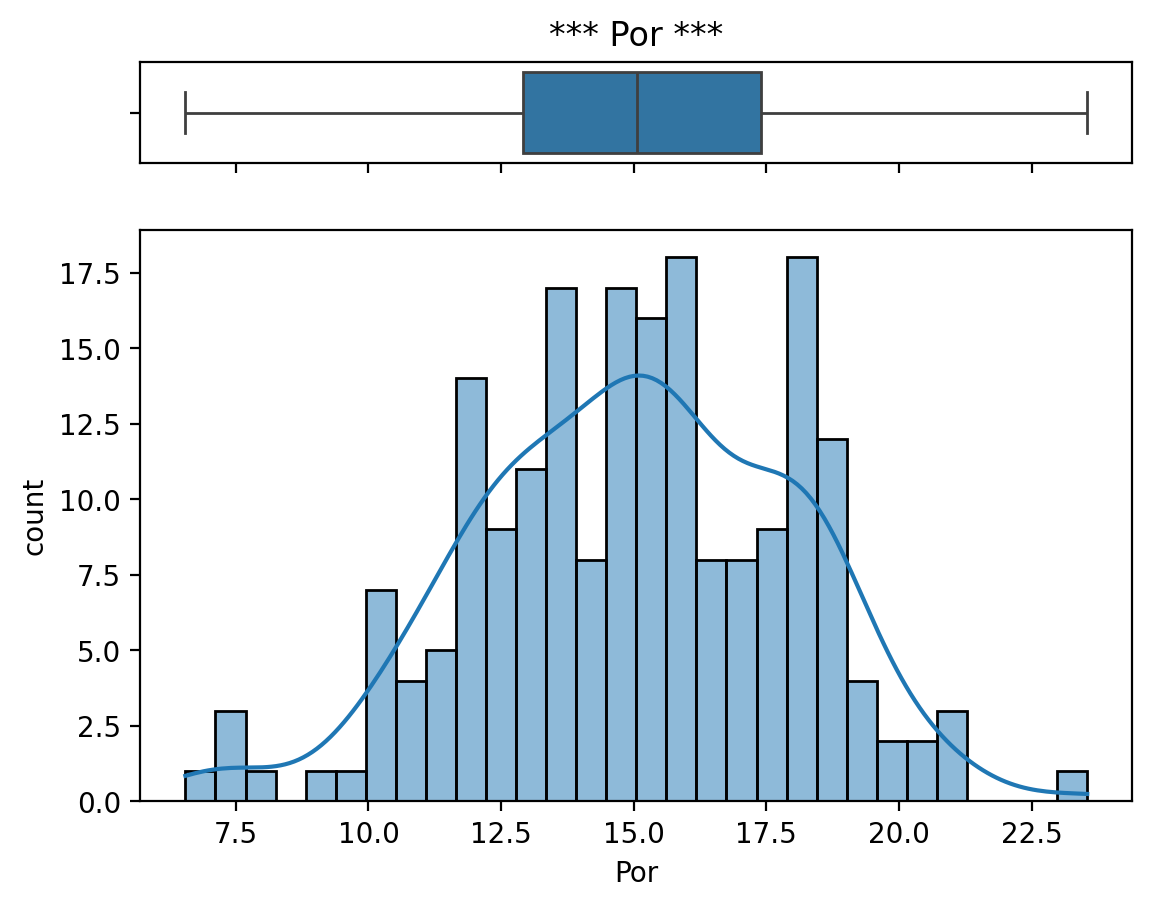

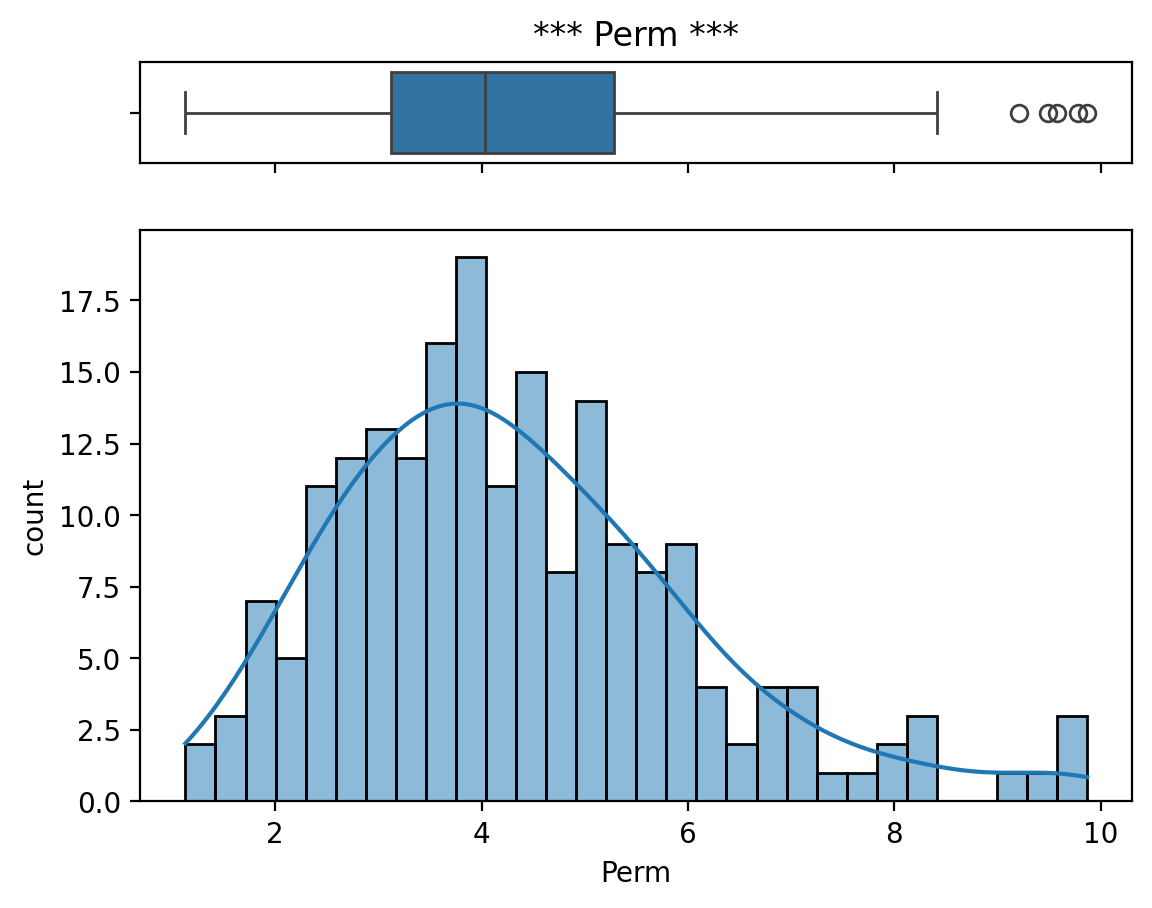

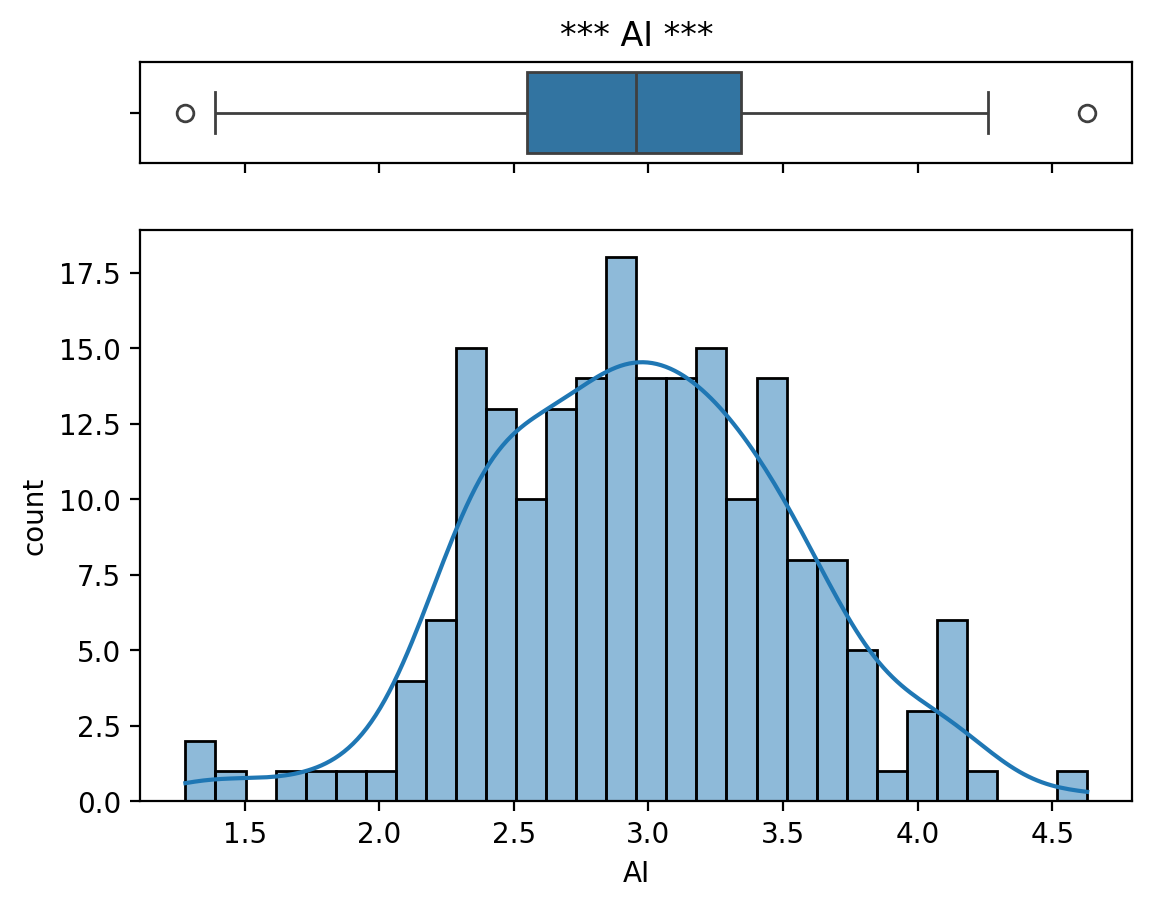

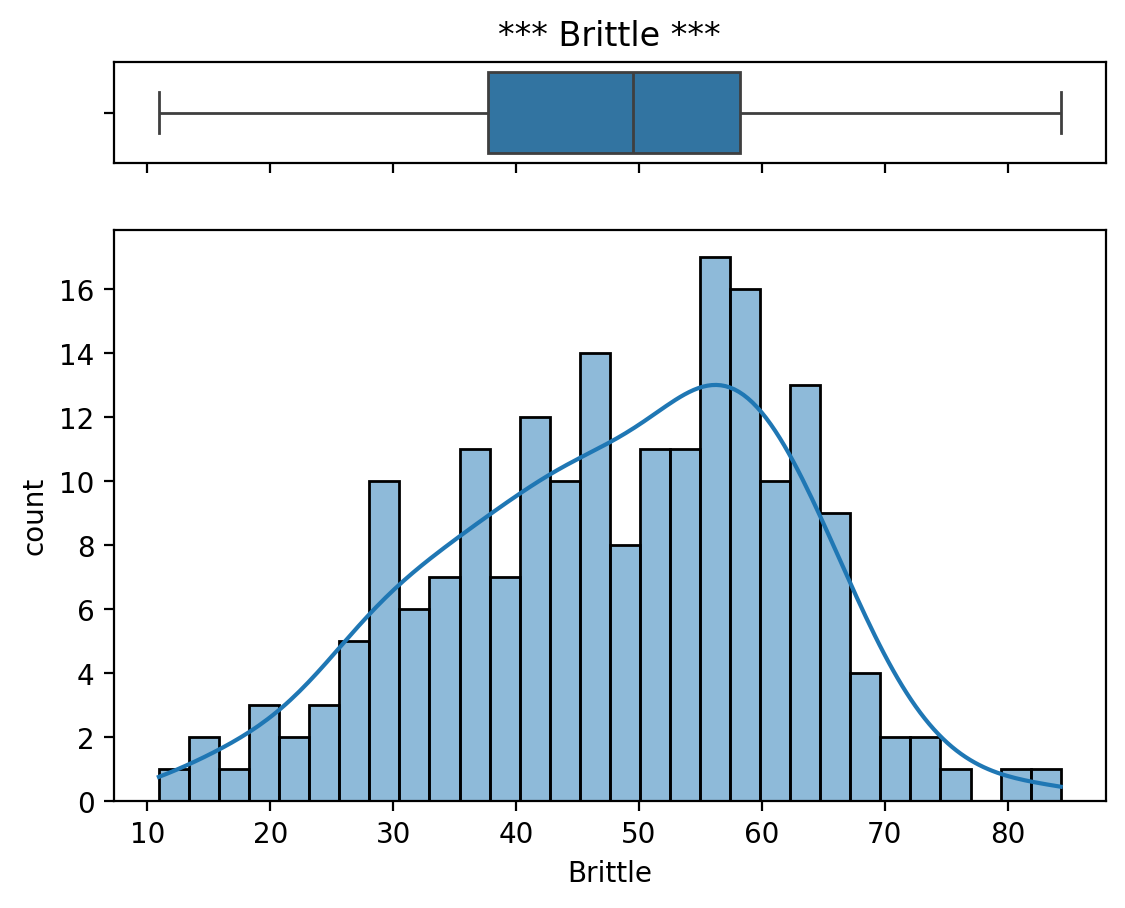

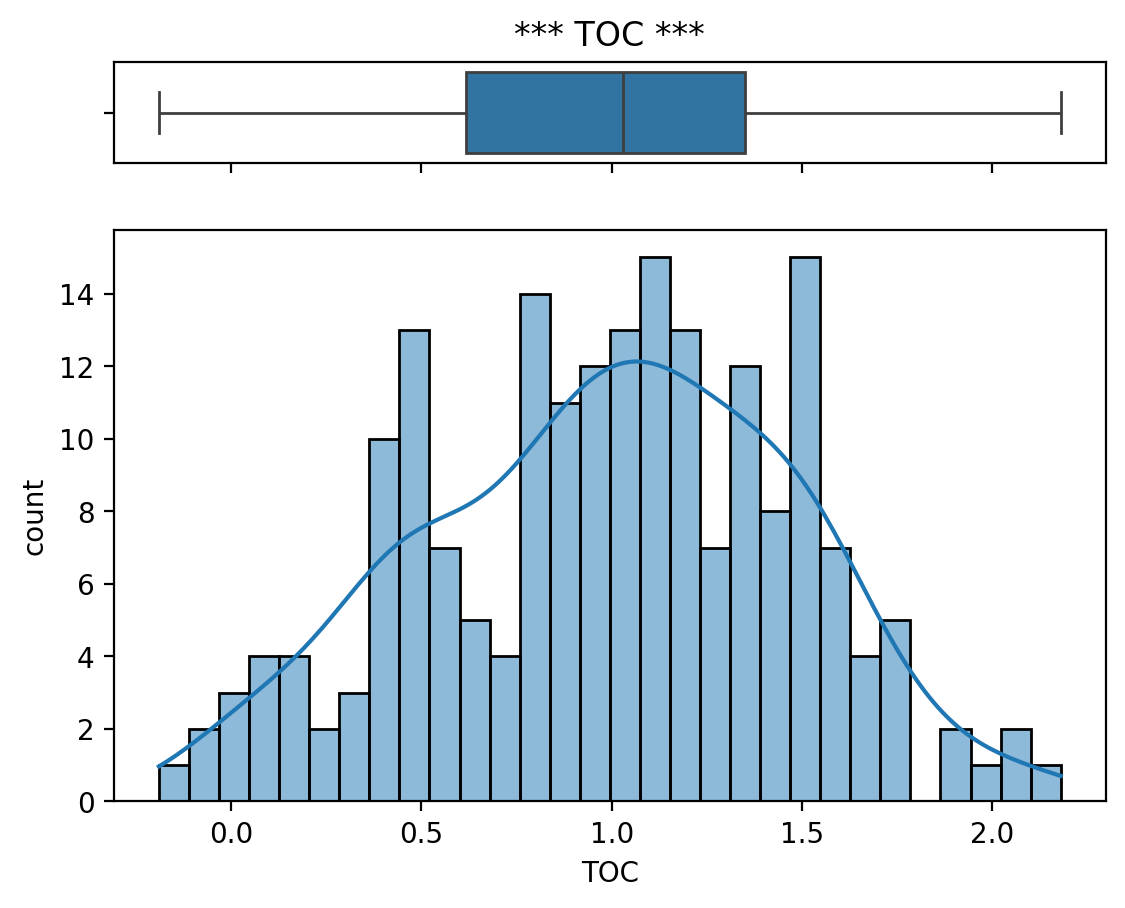

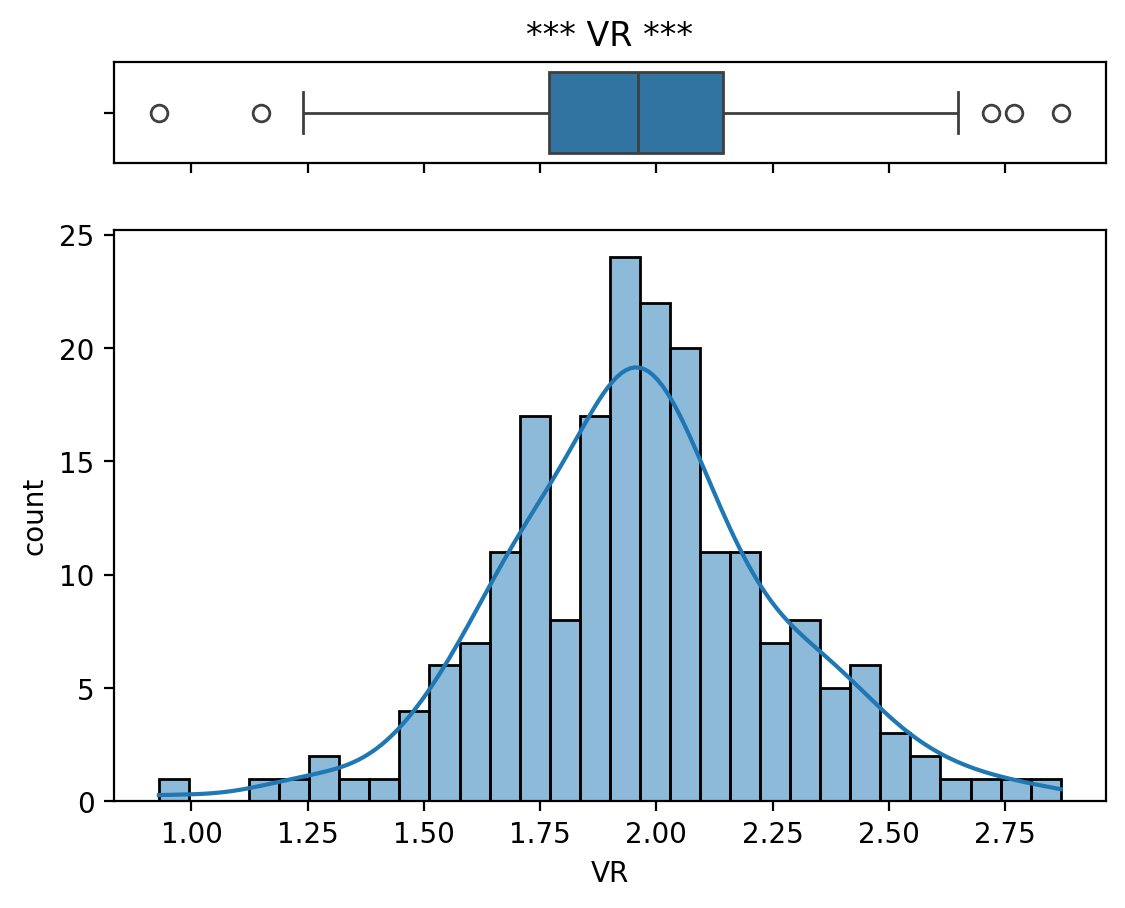

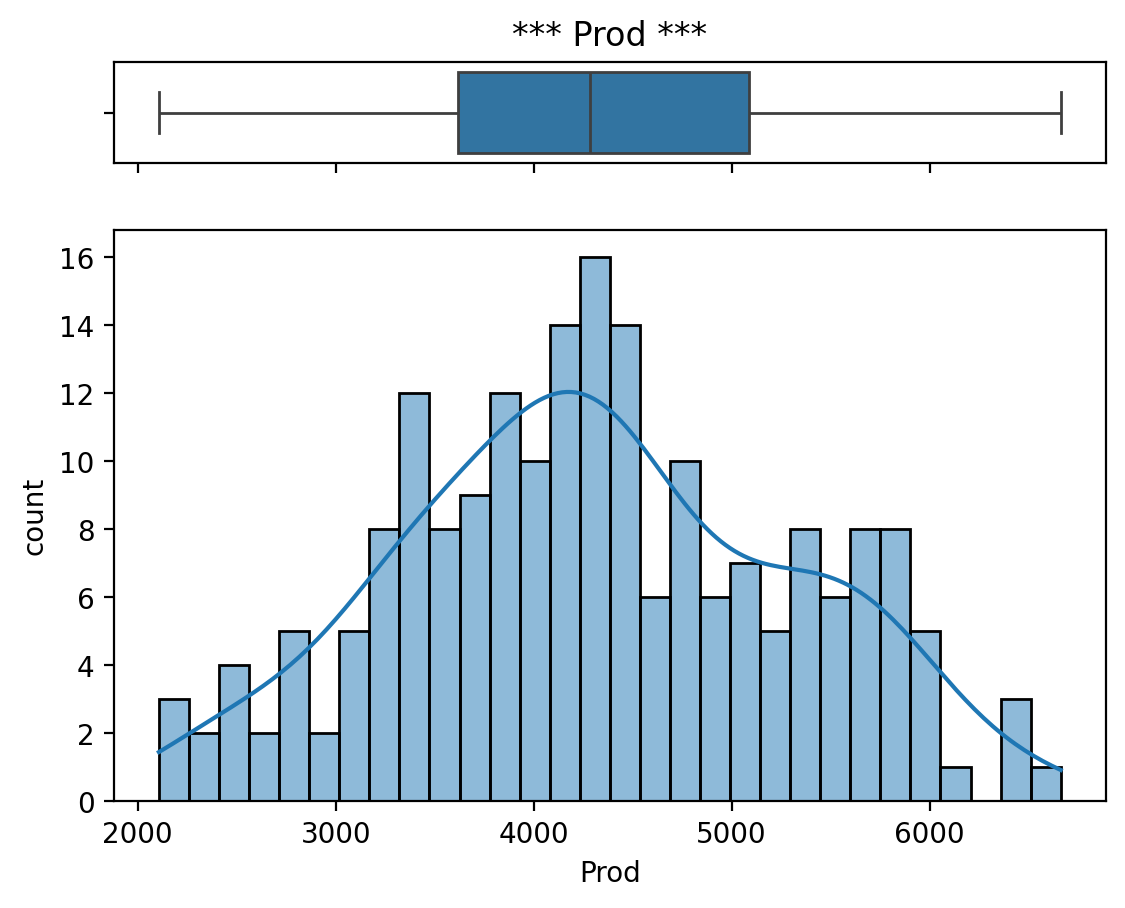

In [7]:
# выведем гистограммы с плотностью распределения и коробки для каждого признака, удалив Well
for col in data.drop("Well", axis=1).columns:
    # создадим два подграфика ax_box и ax_hist
    # кроме того, укажем, что нам нужны:
    fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                        sharex = True, # единая шкала по оси x и
                                        gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте
    
    # затем создадим графики, указав через параметр ax, в какой подграфик поместить каждый из них
    sns.boxplot(x = data[col], ax = ax_box)
    sns.histplot(x = data[col], ax = ax_hist, bins = 30, kde = True)
    
    # добавим подписи к каждому из графиков через метод .set()
    ax_box.set(xlabel = '', title=f"*** {col} ***") # пустые кавычки удаляют подпись (!)
    ax_hist.set(xlabel = f'{col}')
    ax_hist.set(ylabel = 'count')
    
    # выведем результат
    plt.show()

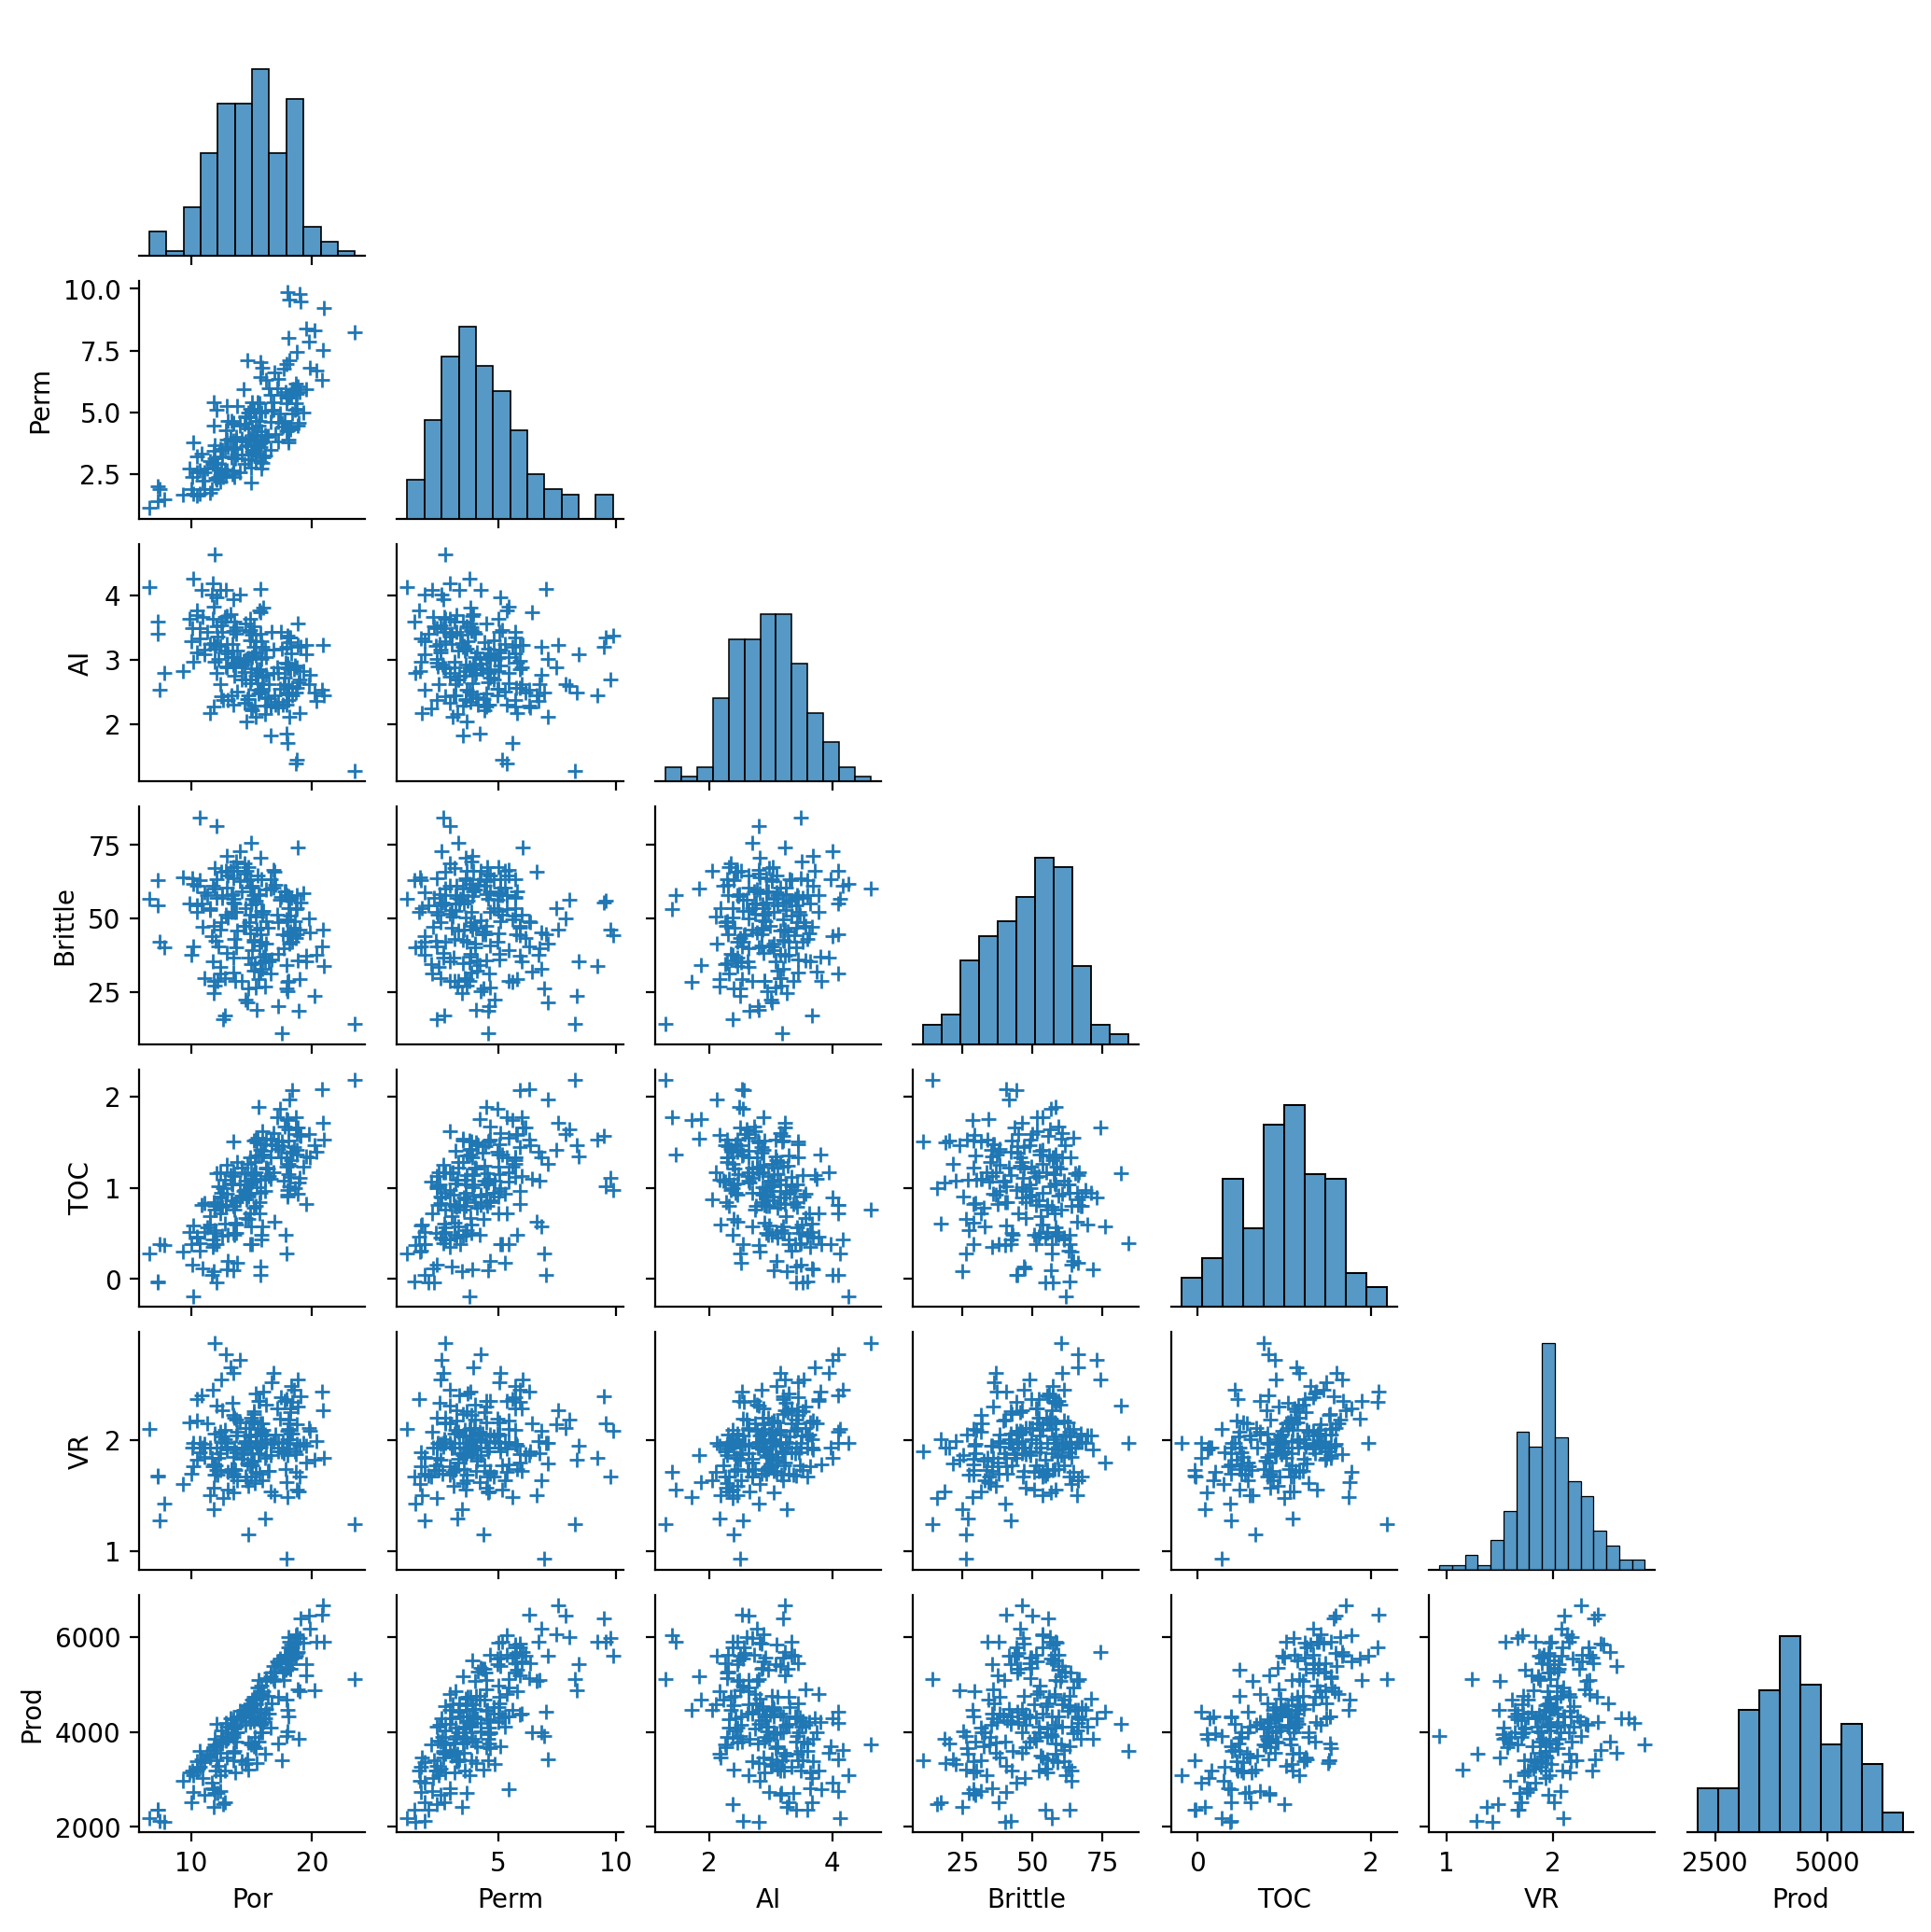

In [8]:
# pairplot для всех признаков, удалив Well
sns.pairplot(data.drop("Well", axis=1), height=1.5, corner=True, plot_kws=dict(marker="+", linewidth=1));

**Выводы:**
- признак `Well` (идентификатор скважины) не учитываем 
- все оставшиеся признаки являются числовыми непрерывными
- бОльшая часть признаков демонстрирует распределение близкое к нормальному, особенно `VR`
- выбросы однозначно имеются в следующих признаках: `Perm`, `AI`, `VR`
- с целевым признаком `Prod` сильно положительно коррелирует `Por`, `Perm`
- также сильно положительно коррелируют друг с другом признаки `Por` и `Perm`

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

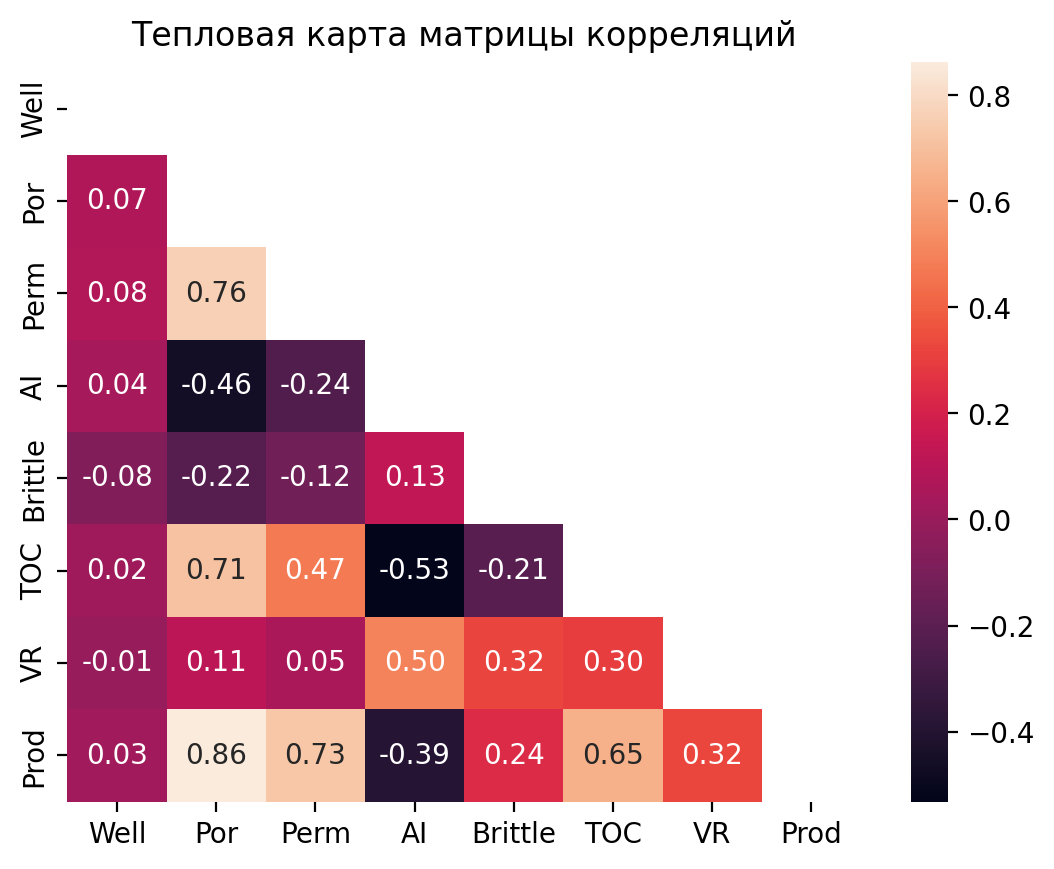

In [9]:
# составим матрицу корреляций
corr_matrix = data.corr()

# строим тепловую карту матрицы корреляций
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask = np.triu(data.corr())).set(
    title = "Тепловая карта матрицы корреляций"
);

Por        0.861910
Perm       0.727426
TOC        0.654445
AI         0.390835
VR         0.323182
Brittle    0.237155
Well       0.026817
Name: Prod, dtype: float64


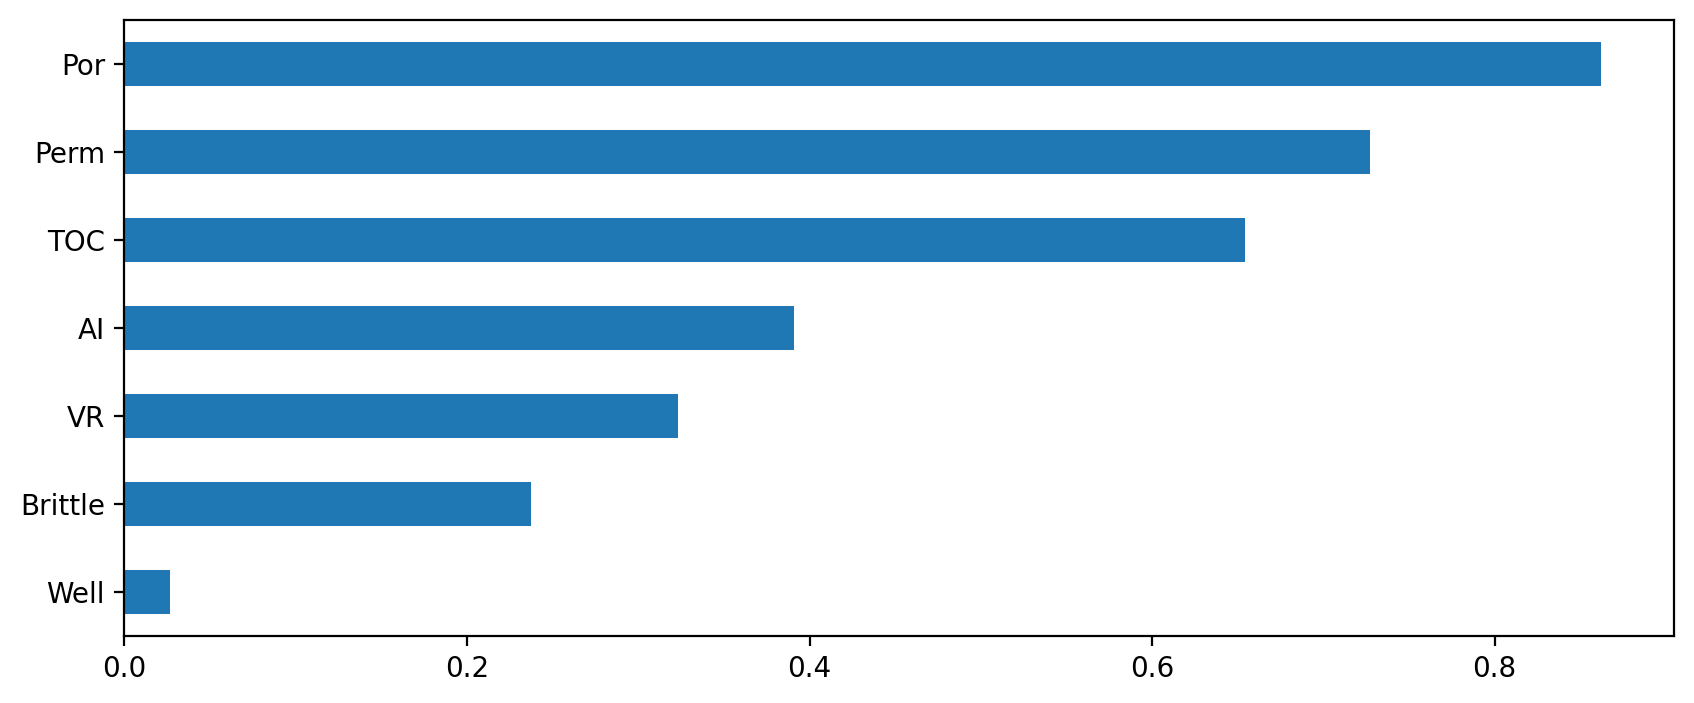

In [10]:
# выведем топ коррелирующих с таргетом факторов (абсолютные значения)
print(data.corr()["Prod"].apply(lambda x: abs(x)).sort_values(ascending=False)[1:])
data.corr()["Prod"].apply(lambda x: abs(x)).sort_values()[:-1].plot.barh(figsize=(10, 4));

In [11]:
# выведем топ коррелирующих признаков

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, method, top_number):
    '''
    Функция выводит топ коррелирующих пар признаков
    Параметры:
        df: датасет
        method: метод корреляции
        top_number: количество пар признаков для вывода на экран
    '''
    au_corr = df.corr(method = method).unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False, key=abs)
    au_corr.name='corr'
    print("Top Absolute Correlations")

    return au_corr[0:top_number].to_frame()

get_top_abs_correlations(data, "pearson", 10)

Top Absolute Correlations


corr
Por  Prod  0.861910
     Perm  0.760546
Perm Prod  0.727426
Por  TOC   0.711831
TOC  Prod  0.654445
AI   TOC  -0.531864
     VR    0.499143
Perm TOC   0.471746
Por  AI   -0.461549
AI   Prod -0.390835

In [12]:
# рассчитаем определитель и ранг матрицы корреляций
corr_matrix_det = np.linalg.det(corr_matrix)
corr_matrix_rank = np.linalg.matrix_rank(corr_matrix)

print(f"Размерность матрицы = {corr_matrix.shape}")
print(f"Определитель = {corr_matrix_det}")
print(f"Ранг = {corr_matrix_rank}")

Размерность матрицы = (8, 8)
Определитель = 0.0007299388072652012
Ранг = 8


**Выводы:**
- в матрице корреляций мы не видим значений выше 0.9, т.е. нет признаков с очень сильной или абсолютной связью
- с таргетом сильную связь (прямую корреляцию равную 0.7-0.9) имеют признаки `Por` и `Perm`
- среднюю связь с таргетом (прямая корреляция 0.5-0.7) имеет признак `TOC`
- сильная связь (прямая корреляция 0.7-0.9) имеется между признаками `Por` и `Perm`, `Por` и `TOC`
- матрица корреляций имеет размерность (8,8), определитель 0.0007, ранг 8
- определитель больше нуля, но не сильно,  получается, что матрица плохо обусловлена
- в то же время ранг матрицы равен числу ее строк/столбцов, признаков с абсолютной связью нет. Но есть признаки, имеющие сильную связь (`Por` и `Perm`, `Por` и `TOC`), что говорит о мультиколлинеарности.
- модель ЛР по МНК в принципе применима, чем мы ниже и займемся (спойлер :)), однако скорее всего мы получим проблемы с весами - большой разброс их значений, трудность интерпретации

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [13]:
# составляем матрицу А (добавив столбей из единиц) и вектор целевой переменной
A = np.column_stack((np.ones(200), data.drop("Prod", axis=1)))
y = data[['Prod']]

# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y

# составляем таблицу из признаков и их коэффициентов округленных до целого
w_df = pd.DataFrame({
    'Features': data.drop('Prod', axis=1).columns, 
    'Coefficients': np.round(w_hat.values[1:,0])
})

# составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({
    'Features': ['INTERCEPT'], 
    'Coefficients': round(w_hat.values[0,0])
})

# объединяем таблицы
coef_df = pd.concat([intercept_df, w_df], ignore_index=True)

display(coef_df)

,Features,Coefficients
0,INTERCEPT,-1232.0
1,Well,0.0
2,Por,230.0
3,Perm,116.0
4,AI,-365.0
5,Brittle,25.0
6,TOC,-78.0
7,VR,785.0


**Выводы:**
- имеется очень большой разброс значений коэффициентов от -1232 `INTERCEPT` (или от -365 `AI`) до 785 `VR`, в абсолютных значениях - от 0 `Well` до 1232 `INTERCEPT` (или до `785` VR)
- Признак `Well` фактически занулен, хотя это вполне логично - вряд ли идентификатор скважины будет оказывать влияние на таргет
- самое слабое (шумовое) влияние на таргет (теоретически) имеет признак `Brittle`: увеличение коэффициента хрупкости скважины на 1% увеличивает добычу на 25млн., в то время, как увеличение `VR` коэффициента отражения витринита на 1% увеличивает добычу на 785млн.
- правильно ли мы интерпретируем коэффициенты выше - вероятно, что нет - данные не нормализованы/ не стандартизированы, разброс коэффициентов также очень велик


### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [14]:
# задаём параметры
well_param = 106
por_param = 15.32
perm_param = 3.71
ai_param = 3.29
brittle_param = 55.99 
toc_param = 1.35
vr_param = 2.42

# зададим реальное количество добычи газа в сутки
prod_real = 4748.315024

# составляем вектор из новых данных
new_params = np.array([1, well_param, por_param, perm_param, ai_param, brittle_param, toc_param, vr_param])

# получаем предсказание
prod_predict = new_params@w_hat

# выводим данные
print('Предсказанное значение: {}'.format(prod_predict.values[0]))
print('Реальное значение: {}'.format(prod_real))
print('Абсолютная ошибка: {}'.format(prod_real - prod_predict.values[0]))

Предсказанное значение: 4723.064053707441
Реальное значение: 4748.315024
Абсолютная ошибка: 25.250970292559032


In [15]:
# напишем функции для расчета MAPE и MAE

def mean_absolute_percentage_error(y_true, y_pred):
    """ Функция для рассчета MAPE """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred):
    """ Функция для рассчета MAE """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# делаем предсказание для всех данных, получая вектор предсказаний
y_predict = A@w_hat

# Рассчитываем MAPE и MAE
print(f'MAPE score: {mean_absolute_percentage_error(y, y_predict)}')
print(f'MAE score: {mean_absolute_error(y, y_predict)}')

MAPE score: 3.6279468451334154
MAE score: 153.62297086555628


**Выводы:**
- вручную построена модель ЛР по МНК, которая довольно точно предсказывает таргет
- метрика MAPE говорит о том, что средняя абсолютная ошибка достигает 3.6%, метрика MAE говорит о том, что ошибка достигает 153млн.куб.футов в ту или иную сторону
- полученное решение демонстрирует хорошие метрики, но, скорее всего, плохую интерпретацию коэффициентов параметров и туманную эффективность на тестовых данных

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

Por        0.861910
Perm       0.727426
TOC        0.654445
AI        -0.390835
VR         0.323182
Brittle    0.237155
Well       0.026817
Name: Prod, dtype: float64


,Features,Coefficients
0,INTERCEPT,-1232.0
1,Well,0.0
2,Por,230.0
3,Perm,116.0
4,AI,-365.0
5,Brittle,25.0
6,TOC,-78.0
7,VR,785.0


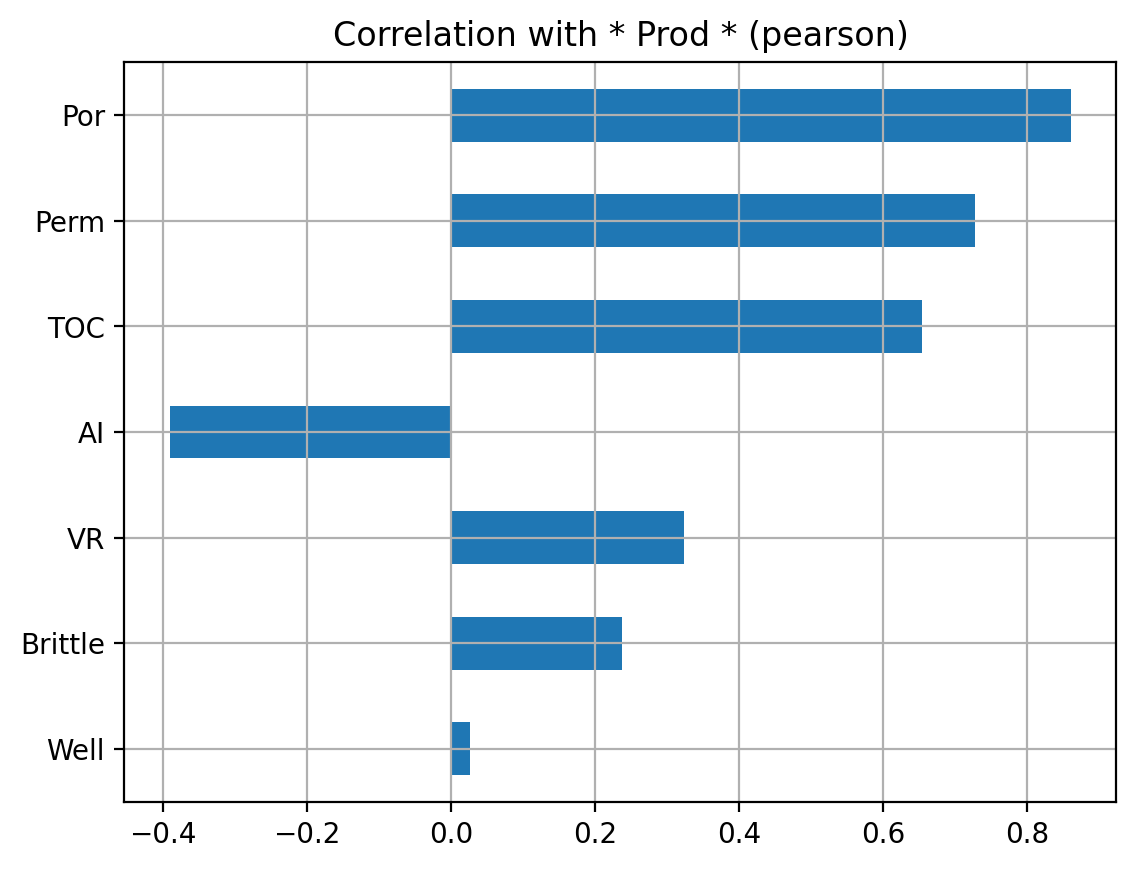

In [16]:
# выведем значения корреляции с таргетом
print(data.corr()["Prod"].sort_values(key=abs, ascending=False)[1:])
data.corr()["Prod"].sort_values(key=abs)[:-1].plot.barh().set_title(
            f'Correlation with * {"Prod"} * (pearson)');
plt.grid()

# выведем полученные коэффициенты
display(coef_df)

**Выводы:**
- совпадение между корреляцией признака с таргетом и подобранным коэффициентом мы видим у признака `Well` - коэффициент нулевой, корреляция слабая и близка к 0
- нечто похожее мы видим с признаком `Brittle`: коэффициент равен 25 (по модулю наименьший после `Well`), слабая прямая корреляция равная 0.24 (по модулю также наименьшая после `Well`)
- признак `TOC` имеет небольшой по модулю и отрицательный коэффициент, в то же время имея сильную связь с таргетом (прямая корреляция равная 0.65)
- тройка признаков-лидеров по абсолютному значению коэффициента: `VR`, `AI`, `Por`; тройка признаков-лидеров по корреляции с таргетом: `Por` `Perm`, `TOC`
- вероятные причины полученных результатов:
    - плохая обусловленность матрицы корреляций
    - мультиколлинеарность 
    - данные не нормализованы/ не стандартизированы
- аналитическое решение получено, но оно не позволяет правильно интерпретировать коэффициенты и вызывает сомнения в эффективности на тестовых данных

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [17]:
# выберем признаки для удаления
cols_drop = ['Perm', 'TOC', 'Well', 'Prod']

# составляем новую матрицу А 
A_2 = np.column_stack((np.ones(200), data.drop(cols_drop, axis=1)))

# вычислим OLS-оценку для коэффициентов
w_hat_2 = np.linalg.inv(A_2.T@A_2)@A_2.T@y

# составляем таблицу из признаков и их коэффициентов округленных до целого
w_df_2 = pd.DataFrame({
    'Features': data.drop(cols_drop, axis=1).columns, 
    'Coefficients': np.round(w_hat_2.values[1:,0])
})

# составляем строку таблицы со свободным членом
intercept_df_2 =pd.DataFrame({
    'Features': ['INTERCEPT'], 
    'Coefficients': round(w_hat_2.values[0,0])
})

# объединяем таблицы
coef_df_2 = pd.concat([intercept_df_2, w_df_2], ignore_index=True)

# делаем предсказание для всех данных, получая вектор предсказаний
y_predict = A_2@w_hat_2

# Рассчитываем MAPE и MAE
print(f'MAPE score: {mean_absolute_percentage_error(y, y_predict)}')
print(f'MAE score: {mean_absolute_error(y, y_predict)}')

display(coef_df_2)

MAPE score: 4.044138420436065
MAE score: 171.43146059580795


,Features,Coefficients
0,INTERCEPT,-1835.0
1,Por,293.0
2,AI,-200.0
3,Brittle,28.0
4,VR,517.0


**Выводы:**
- сильно коррелирующие между собой признаки `Por` - `Perm`, `Por` - `Toc`, оставляем только `Por`, как наиболее коррелирующий с таргетом признак
- исключен признак `Well`, т.к. его корреляция с таргетом менее 0.05
- соответственно, получен обновленный `INTERCEPT` (вырос по модулю на треть) и еще 4 обновленных коэффициента
- разброс между значениями обновленных коэффициентов стал меньше: от -200 AI до 517 VR (без учета `INTERCEPT`), разброс по модулю также меньше: от 28 до 517.
- наиболее сильно с таргетом связан признак `Por`, значение его коэффициента 293, а вот связь признака `VR` с таргетом почти наименьшая, а коэффициент наоборот наибольший
- `Brittle` наименее связан с таргетом и коэффициент у него по модулю наименьший
- наибольший "вклад" в предсказание дает признак `VR` и `Por`, наименьший - `Brittle`
- метрики ухудшились, но некритично
- итог: с уменьшением количства признаков в матрице наблюдений мы получили меньши разброс коэффициентов (если не учитыввать свободный коэффициент), немного более худшие метрики (некритично), но коэффициенты стали несколько более интерпретируемыми

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [19]:
# импорт модели
from sklearn.linear_model import LinearRegression

# создаём модель линейной регрессии
model_lr = LinearRegression(fit_intercept=False)
# обучаем модель и вычисляем коэффициенты регрессии
model_lr.fit(A_2, y)

# предсказываем таргет
model_pred = model_lr.predict(A_2)

# Рассчитываем MAPE и MAE
print(f'MAPE score: {mean_absolute_percentage_error(y, model_pred)}')
print(f'MAE score: {mean_absolute_error(y, model_pred)}')

print('w_hat_lr:', np.round(*model_lr.coef_))

MAPE score: 4.04413842043605
MAE score: 171.4314605958078
w_hat_lr: [-1835.   293.  -200.    28.   517.]


**Выводы:**
- коэффициенты, полученные при использовании модели `LinearRegression` из `sklearn` совпадают, с полученными нами выше
- метрики практически также совпадают
- хорошая работа ! :)

In [23]:
# дополнительно получим метрики на кросс-валидации (для выполнения задания 8.5)

# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(
    model_lr, 
    A_2, 
    y, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, # количество фолдов
    return_train_score=True
)
# рассчитываем метрики
model_lr_mape_train = -cv_results['train_score'].mean()* 100
model_lr_mape_valid = -cv_results['test_score'].mean() * 100

# информация о полученных метриках
print('MAPE на тренировочных фолдах: {:.1f} %'.format(model_lr_mape_train))
print('MAPE на валидационных фолдах: {:.1f} %'.format(model_lr_mape_valid))

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(
    model_lr, 
    A_2, 
    y, 
    scoring='neg_mean_absolute_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_lr_mae_train = -cv_results['train_score'].mean()
model_lr_mae_valid = -cv_results['test_score'].mean()

# информация о полученных метриках
print('MAE на тренировочных фолдах: {:.1f}'.format(model_lr_mae_train))
print('MAE на валидационных фолдах: {:.1f}'.format(model_lr_mae_valid))

MAPE на тренировочных фолдах: 4.0 %
MAPE на валидационных фолдах: 4.2 %
MAE на тренировочных фолдах: 170.5
MAE на валидационных фолдах: 179.0


## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [20]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [24]:
# стнадартизация признаков
scaler = StandardScaler()
# из уже готовой для работы матрицы A_2 выбрасываем 1-й столбец из единиц и стандартизируем
A_2_scaled = scaler.fit_transform(A_2[:,1:])

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
A_2_poly = poly.fit_transform(A_2_scaled)

# выведем информацию о признаках
print(f"Количество начальных отобранных признаков: {A_2[:,1:].shape[1]}")
print(f"Количество полномиальных признаков: {A_2_poly.shape[1]}")

# создаём модель линейной регрессии
model_lr_poly = LinearRegression()
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(
    model_lr_poly, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_lr_poly_mape_train = -cv_results['train_score'].mean()* 100
model_lr_poly_mape_valid = -cv_results['test_score'].mean() * 100

# информация о полученных метриках
print('MAPE на тренировочных фолдах: {:.1f} %'.format(model_lr_poly_mape_train))
print('MAPE на валидационных фолдах: {:.1f} %'.format(model_lr_poly_mape_valid))

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(
    model_lr_poly, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_lr_poly_mae_train = -cv_results['train_score'].mean()
model_lr_poly_mae_valid = -cv_results['test_score'].mean()

# информация о полученных метриках
print('MAE на тренировочных фолдах: {:.1f}'.format(model_lr_poly_mae_train))
print('MAE на валидационных фолдах: {:.1f}'.format(model_lr_poly_mae_valid))

Количество начальных отобранных признаков: 4
Количество полномиальных признаков: 34
MAPE на тренировочных фолдах: 1.8 %
MAPE на валидационных фолдах: 2.7 %
MAE на тренировочных фолдах: 75.3
MAE на валидационных фолдах: 110.5


**Выводы:**
- метрики ЛР с полиномиальными признаками улучшились даже на валидационных фолдах, по сравнению с метриками классической ЛР
- переобучения нет, хотя интересно было бы проверить на отдельной тестовой выборке

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
%%time
# мне нравится optuna для подбора гиперпараметров
import optuna
# импортируем дополнительно для optuna
from sklearn.model_selection import cross_val_score

def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    alpha = trial.suggest_float('alpha', low=0.01, high=5, step=0.01)

    # создаем модель
    model = Lasso(
        alpha=alpha, 
        random_state=42,
        max_iter=10000
    )
    
    # обучаем модель
    model.fit(A_2_poly, y)

    # метрика с кросс-валидацией
    score = cross_val_score(
    model, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_error', # используем MAE
    cv=5, # количество фолдов
    ).mean()

    return -score # - т.к. минимизируем метрику

# cоздаем объект исследования
study = optuna.create_study(study_name="LassoRegression", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=1000)

In [27]:
# выводим результаты подбора гиперепараметров
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("MAE на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'alpha': 4.61}
MAE на обучающем наборе: 95.66


In [28]:
# создаём модель Lasso регрессии с наилучшими параметрами
model_lasso = Lasso(**study.best_params)
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(
    model_lasso, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_lasso_mape_train = -cv_results['train_score'].mean()* 100
model_lasso_mape_valid = -cv_results['test_score'].mean() * 100

# информация о полученных метриках
print('MAPE на тренировочных фолдах: {:.1f} %'.format(model_lasso_mape_train))
print('MAPE на валидационных фолдах: {:.1f} %'.format(model_lasso_mape_valid))

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(
    model_lasso, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_lasso_mae_train = -cv_results['train_score'].mean()
model_lasso_mae_valid = -cv_results['test_score'].mean()

# информация о полученных метриках
print('MAE на тренировочных фолдах: {:.1f}'.format(model_lasso_mae_train))
print('MAE на валидационных фолдах: {:.1f}'.format(model_lasso_mae_valid))

MAPE на тренировочных фолдах: 1.8 %
MAPE на валидационных фолдах: 2.3 %
MAE на тренировочных фолдах: 78.0
MAE на валидационных фолдах: 95.7


**Выводы:**
- модель ЛР с полиномами и регуляризацией Lasso с подобранным гиперпараметром alpha демонстрирует незначительное ухудшение метрик на тренировочных фолдах, и улучшение метрик на валидационных

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
%%time
def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    alpha = trial.suggest_float('alpha', low=0.01, high=10, step=0.01)

    # создаем модель
    model = Ridge(
        alpha=alpha, 
        random_state=42,
        max_iter=10000
    )
    
    # обучаем модель
    model.fit(A_2_poly, y)

    # метрика с кросс-валидацией
    score = cross_val_score(
    model, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_error', # используем MAE
    cv=5, # количество фолдов
    ).mean()

    return -score # - т.к. минимизируем метрику

# cоздаем объект исследования
study = optuna.create_study(study_name="RidgeRegression", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=1000)

In [30]:
# выводим результаты подбора гиперепараметров
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("MAE на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'alpha': 0.21000000000000002}
MAE на обучающем наборе: 110.07


In [31]:
# создаём модель Ridge регрессии с лучшими параметрами
model_ridge = Ridge(**study.best_params)
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(
    model_ridge, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_ridge_mape_train = -cv_results['train_score'].mean()* 100
model_ridge_mape_valid = -cv_results['test_score'].mean() * 100

# информация о полученных метриках
print('MAPE на тренировочных фолдах: {:.1f} %'.format(model_ridge_mape_train))
print('MAPE на валидационных фолдах: {:.1f} %'.format(model_ridge_mape_valid))

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(
    model_ridge, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_ridge_mae_train = -cv_results['train_score'].mean()
model_ridge_mae_valid = -cv_results['test_score'].mean()

# информация о полученных метриках
print('MAE на тренировочных фолдах: {:.1f}'.format(model_ridge_mae_train))
print('MAE на валидационных фолдах: {:.1f}'.format(model_ridge_mae_valid))

MAPE на тренировочных фолдах: 1.8 %
MAPE на валидационных фолдах: 2.7 %
MAE на тренировочных фолдах: 75.4
MAE на валидационных фолдах: 110.1


**Выводы:**
- метрики модели ЛР с полиномами и регуляризацией Ridge схожи с метриками модели ЛР с полиномами без регуляризации

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
%%time
# опртимизация optuna
def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    alpha = trial.suggest_float('alpha', low=0.01, high=10, step=0.01)
    l1_ratio = trial.suggest_float('l1_ratio', low=0.0, high=1, step=0.01)

    # создаем модель
    model = ElasticNet(
        alpha=alpha, 
        l1_ratio=l1_ratio,
        random_state=42,
        max_iter=10000
    )
    
    # обучаем модель
    model.fit(A_2_poly, y)

    # метрика с кросс-валидацией
    score = cross_val_score(
    model, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_error', # используем MAE
    cv=5, # количество фолдов
    ).mean()

    return -score # - т.к. минимизируем метрику

# cоздаем объект исследования
study = optuna.create_study(study_name="ElasticNetRegression", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=1000)

In [33]:
# выводим результаты подбора гиперепараметров
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("MAE на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'alpha': 4.61, 'l1_ratio': 1.0}
MAE на обучающем наборе: 95.66


In [34]:
# создаём модель ElasticNet регрессии
model_en = ElasticNet(**study.best_params)
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(
    model_en, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_percentage_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_en_mape_train = -cv_results['train_score'].mean()* 100
model_en_mape_valid = -cv_results['test_score'].mean() * 100

# информация о полученных метриках
print('MAPE на тренировочных фолдах: {:.1f} %'.format(model_en_mape_train))
print('MAPE на валидационных фолдах: {:.1f} %'.format(model_en_mape_valid))

# оцениваем качество модели на кросс-валидации, метрика — MAE
cv_results = cross_validate(
    model_en, 
    A_2_poly, 
    y, 
    scoring='neg_mean_absolute_error', 
    cv=5, # количество фолдов
    return_train_score=True
)

# рассчитываем метрики
model_en_mae_train = -cv_results['train_score'].mean()
model_en_mae_valid = -cv_results['test_score'].mean()

# информация о полученных метриках
print('MAE на тренировочных фолдах: {:.1f}'.format(model_en_mae_train))
print('MAE на валидационных фолдах: {:.1f}'.format(model_en_mae_valid))

MAPE на тренировочных фолдах: 1.8 %
MAPE на валидационных фолдах: 2.3 %
MAE на тренировочных фолдах: 78.0
MAE на валидационных фолдах: 95.7


**Выводы:**
- метрики ЛР с полиномами и регуляризацией ElasticNet идентичны метрикам ЛР с полиномами и регуляризацией Lasso, причина - наилучшее значение гиперпараметра l1_ratio=1, что превращает данную модель в ЛР с регуляризацией Lasso

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [55]:
# собираем итговую таблицу с результатами
table_of_models = pd.DataFrame({
    "Модель" : ["LR", "LR polynomial", "Lasso", "Ridge", "ElasticNet"],
    "Гиперпараметры" : ["нет","нет","alpha = 4.61","alpha = 0.21","alpha = 4.61, l1_ratio = 1.0"],
    "Полиномиальные признаки": ["нет","да","да","да","да"],
    "MAPE train, %" : [model_lr_mape_train, model_lr_poly_mape_train, model_lasso_mape_train, model_ridge_mape_train, model_en_mape_train],
    "MAPE valid, %" : [model_lr_mape_valid, model_lr_poly_mape_valid, model_lasso_mape_valid, model_ridge_mape_valid, model_en_mape_valid],
    "MAE train" : [model_lr_mae_train, model_lr_poly_mae_train, model_lasso_mae_train, model_ridge_mae_train, model_en_mae_train],
    "MAE valid" : [model_lr_mae_valid, model_lr_poly_mae_valid, model_lasso_mae_valid, model_ridge_mae_valid, model_en_mae_valid],
})

# добавим разницу между train/valid метриками
table_of_models["MAPE diff, %"] = table_of_models["MAPE valid, %"] - table_of_models["MAPE train, %"]
table_of_models["MAE diff"] = table_of_models["MAE valid"] - table_of_models["MAE train"]

# выведем таблицу, округлив значения метрик
display(round(table_of_models, 2))

,Модель,Гиперпараметры,Полиномиальные признаки,"MAPE train, %","MAPE valid, %",MAE train,MAE valid,"MAPE diff, %",MAE diff
0,LR,нет,нет,4.02,4.23,170.50,179.02,0.21,8.52
1,LR polynomial,нет,да,1.77,2.68,75.35,110.47,0.91,35.13
2,Lasso,alpha = 4.61,да,1.82,2.28,78.02,95.66,0.45,17.64
3,Ridge,alpha = 0.21,да,1.77,2.67,75.41,110.07,0.90,34.66
4,ElasticNet,"alpha = 4.61, l1_ratio = 1.0",да,1.82,2.28,78.02,95.66,0.45,17.64


**Выводы:**
- `классическая модель ЛР` без полиномиальных признаков:
    - показывает наихудшие метрики,
    - однако более проста в реализации, не требует настройки гиперпараметров, более быстрая в обучении, наименее склонна к переобучению из всех моделей
- `модель ЛР с полиномиальными признаками` и `модель ЛР с регуляризацией Ridge` (с подобранным гиперпараметром **alpha**) показывают практически идентичные метрики и максимальную склонность к переобучению среди представленных моделей
- `модель ЛР с регуляризацией Lasso` демонстрирует наилучшие метрики на **train** и **valid** выборках и наименьшую склонность к переобучению, после классической ЛР без полиномов
- `модель ЛР с регуляризацией ElasticNet` показывает идентичные метрики с `Lasso`, что объясняется подобранным гиперпараметром **l1_ratio = 1.0**, что превращает данную модель в `Lasso`
- победитель - `модель ЛР с регуляризацией Lasso`
- модели требуют исследования на отдельной тестовой выборке